In [480]:
%load_ext autoreload
%autoreload 2

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import *    
import os 
import pyreadr
import numpy as np
import pyreadr
import pandas as pd
import multiprocessing
from joblib import Parallel, delayed
import butterfly.album
import butterfly.Models
from itertools import combinations 
from joblib import parallel_backend
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
from sklearn.metrics import r2_score
import pickle
from sklearn.model_selection import GroupKFold
from random import sample
from scipy import stats
from sklearn.metrics import mean_absolute_error
from collections import defaultdict
import time
from keras.applications.resnet50 import ResNet50
from sklearn.dummy import DummyRegressor
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [481]:
#Model
folds = 10 #number of folds
features = 1 #number of features to predict
epochs = 200 #number of epochs
optimiser = 'adam' #model optimiser
loss = 'mse' #model loss
ntrees = 100

In [482]:
#Import your data
#DF = pyreadr.read_r('/Users/mxenoc/Desktop/workspace/butterfly/data/omics.RData')
DF = pyreadr.read_r('/home/mxenoc/workspace/butterfly/data/omics.RData')
DF = DF["DF"]

In [483]:
#Define the predictor datasets
omics = ['rna', 'plasma_l', 'serum_l', 'microb', 'immune', 'metabol', 'plasma_s']

In [549]:
os.chdir('/home/mxenoc/workspace/butterfly/src/butterfly')

In [550]:
with open('albums_all.pkl', 'rb') as f:
    albums_all = pickle.load(f)

In [487]:
with open('albums.pkl', 'rb') as f:
    albums = pickle.load(f)

In [554]:
os.chdir('/home/mxenoc/workspace/butterfly/notebooks')

In [555]:
with open('RF_predictor.pkl', 'rb') as f:
    RF_predictor = pickle.load(f)

In [492]:
with open('responses_60.pkl', 'rb') as f:
    responses = pickle.load(f)

In [493]:
n_samples = 60 #same as the number of responses

In [494]:
CNN = defaultdict(list)

for predictor_index in tqdm(range(len(omics))):
        
    prediction_train, observed_train, prediction_test, observed_test = zip(*Parallel(n_jobs=n_samples)
                           (delayed(butterfly.Models.CNN)(albums_all, DF, feat_n, predictor_index,  
                            responses, 128, features, folds, epochs, optimiser, loss, 'CNN')for feat_n in range(n_samples)))
        
    CNN['prediction_train'].append(prediction_train)
    CNN['observed_train'].append(observed_train)
    CNN['prediction_test'].append(prediction_test)
    CNN['observed_test'].append(observed_test)


 29%|██▊       | 2/7 [11:12<28:18, 339.66s/it]/home/mxenoc/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning

100%|██████████| 7/7 [42:42<00:00, 366.12s/it]


In [495]:
with open('CNN.pkl', 'wb') as f:  
    pickle.dump(CNN, f)

In [700]:
MCNN = defaultdict(list)

for predictor_index in tqdm(range(len(omics))):
        
    prediction_train, observed_train, prediction_test, observed_test = zip(*Parallel(n_jobs=n_samples)
                           (delayed(butterfly.Models.CNN)(albums, DF, feat_n, predictor_index,  
                            responses, 40, features, folds, epochs, optimiser, loss, 'MCNN',
                                                         'TSNE_M', 2)for feat_n in range(n_samples)))
        
    MCNN['prediction_train'].append(prediction_train)
    MCNN['observed_train'].append(observed_train)
    MCNN['prediction_test'].append(prediction_test)
    MCNN['observed_test'].append(observed_test)




  0%|          | 0/7 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
with open('MCNN_M.pkl', 'wb') as f:  
    pickle.dump(MCNN_M, f)

In [ ]:
RF = defaultdict(list)

for predictor_index in tqdm(range(len(omics))):

    prediction_train, observed_train, prediction_test, observed_test = zip(*Parallel(n_jobs=n_samples)
                           (delayed(butterfly.Models.RF)(DF, responses, predictor_index, feat_n, 
                            RF_predictor, folds, ntrees, 'RF_regressor')for feat_n in range(n_samples)))
        
    RF['prediction_train'].append(prediction_train)
    RF['observed_train'].append(observed_train)
    RF['prediction_test'].append(prediction_test)
    RF['observed_test'].append(observed_test)

 14%|█▍        | 1/7 [20:08<2:00:50, 1208.43s/it]/home/mxenoc/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
 71%|███████▏  | 5/7 [2:01:46<47:58, 1439.45s/it]  

In [ ]:
with open('RF.pkl', 'wb') as f:  
    pickle.dump(RF, f)

In [496]:
LS = defaultdict(list)

for predictor_index in tqdm(range(len(omics))):

    prediction_train, observed_train, prediction_test, observed_test = zip(*Parallel(n_jobs=n_samples)
                           (delayed(butterfly.Models.RF)(DF, responses, predictor_index, feat_n, 
                            RF_predictor, folds, ntrees, 'Lasso')for feat_n in range(n_samples)))
        
    LS['prediction_train'].append(prediction_train)
    LS['observed_train'].append(observed_train)
    LS['prediction_test'].append(prediction_test)
    LS['observed_test'].append(observed_test)


100%|██████████| 7/7 [13:30<00:00, 115.76s/it]


In [497]:
with open('LS.pkl', 'wb') as f:  
    pickle.dump(LS, f)

In [498]:
Dummy = defaultdict(list)

for predictor_index in tqdm(range(len(omics))):

    prediction_train, observed_train, prediction_test, observed_test = zip(*Parallel(n_jobs=n_samples)
                           (delayed(butterfly.Models.RF)(DF, responses, predictor_index, feat_n, 
                            RF_predictor, folds, ntrees, 'Dummy')for feat_n in range(n_samples)))
        
    Dummy['prediction_train'].append(prediction_train)
    Dummy['observed_train'].append(observed_train)
    Dummy['prediction_test'].append(prediction_test)
    Dummy['observed_test'].append(observed_test)


100%|██████████| 7/7 [01:06<00:00,  9.48s/it]


In [499]:
with open('Dummy.pkl', 'wb') as f:  
    pickle.dump(Dummy, f)

In [23]:
# load model
model = ResNet50()
# summarize the model
#model.summary()

In [ ]:
n_samples = 30 #same as the number of responses

RN = defaultdict(list)

for predictor_index in tqdm(range(len(omics))):
        
    prediction_train, observed_train, prediction_test, observed_test = zip(*Parallel(n_jobs=n_samples)
                           (delayed(butterfly.Models.CNN)(albums_all, DF, feat_n, predictor_index,  
                            responses, 128, features, folds, epochs, optimiser, loss, 'ResNet')for feat_n in range(n_samples)))
        
    RN['prediction_train'].append(prediction_train)
    RN['observed_train'].append(observed_train)
    RN['prediction_test'].append(prediction_test)
    RN['observed_test'].append(observed_test)

In [697]:
os.chdir('/home/mxenoc/workspace/butterfly/notebooks')

In [698]:
with open('MCNN_M.pkl', 'rb') as f:
    MCNN_M = pickle.load(f)

EOFError: Ran out of input

In [675]:
with open('CNN_Matrix.pkl', 'rb') as f:
    CNN_Matrix = pickle.load(f)

In [310]:
with open('CNN.pkl', 'rb') as f:
    CNN = pickle.load(f)

In [514]:
with open('RF.pkl', 'rb') as f:
    RF = pickle.load(f)

In [525]:
with open('MCNN.pkl', 'rb') as f:
    MCNN = pickle.load(f)

In [580]:
with open('RF_T.pkl', 'rb') as f:
    RF_T = pickle.load(f)

In [516]:
#responses
feats  = np.hstack([np.tile('rna',n_samples), np.tile('plasma_l',n_samples), np.tile('serum_l',n_samples), np.tile('microbiome',n_samples), 
                    np.tile('immune',n_samples), np.tile('metabolomics',n_samples), np.tile('plasma_s',n_samples)])

In [517]:
each_omic_CNN_r = []
each_omic_CNN_p = []

all_features_CNN_r = []
all_features_CNN_p = []

for l in range(len(omics)):
    each_feature_CNN_r = []
    each_feature_CNN_p = []
    for k in range(n_samples):
            each_feature_CNN_r.append(stats.spearmanr(CNN['prediction_test'][l][k], 
                                                          CNN['observed_test'][l][k])[0])
            each_feature_CNN_p.append(stats.spearmanr(CNN['prediction_test'][l][k], 
                                                          CNN['observed_test'][l][k])[1])
    all_features_CNN_r.append(each_feature_CNN_r)
    all_features_CNN_p.append(each_feature_CNN_p)
    each_omic_CNN_r.append(np.mean(each_feature_CNN_r))    
    each_omic_CNN_p.append(np.mean(each_feature_CNN_p))    
    
CNN_r = np.hstack(all_features_CNN_r)
CNN_p = np.hstack(all_features_CNN_p)
CNN_r_p = pd.DataFrame({'r': CNN_r, 'p': CNN_p, 'omics': feats, 'model': 'CNN'})

In [518]:
CNN_r_p = pd.DataFrame({'r': CNN_r, 'p': CNN_p, 'omics': feats, 'model': 'CNN'})

In [519]:
each_omic_LS_r = []
each_omic_LS_p = []

all_features_LS_r = []
all_features_LS_p = []

for l in range(len(omics)):
    each_feature_LS_r = []
    each_feature_LS_p = []
    for k in range(n_samples):
            each_feature_LS_r.append(stats.spearmanr(LS['prediction_test'][l][k], 
                                                          LS['observed_test'][l][k])[0])
            each_feature_LS_p.append(stats.spearmanr(LS['prediction_test'][l][k], 
                                                          LS['observed_test'][l][k])[1])
    all_features_LS_r.append(each_feature_LS_r)
    all_features_LS_p.append(each_feature_LS_p)
    each_omic_LS_r.append(np.mean(each_feature_LS_r))    
    each_omic_LS_p.append(np.mean(each_feature_LS_p))    
    
LS_r = np.hstack(all_features_LS_r)
LS_p = np.hstack(all_features_LS_p)
LS_r_p = pd.DataFrame({'r': LS_r, 'p': LS_p, 'omics': feats, 'model': 'LS'})

In [520]:
LS_r_p = pd.DataFrame({'r': LS_r, 'p': LS_p, 'omics': feats, 'model': 'LS'})

In [695]:
each_omic_r = []
each_omic_p = []

all_features_r = []
all_features_p = []

for l in range(len(omics)):
    each_feature_r = []
    each_feature_p = []
    for k in range(n_samples):
            each_feature_r.append(stats.spearmanr(MCNN_M['prediction_test'][l][k], 
                                                          MCNN_M['observed_test'][l][k])[0])
            each_feature_p.append(stats.spearmanr(MCNN_M['prediction_test'][l][k], 
                                                          MCNN_M['observed_test'][l][k])[1])
    all_features_r.append(each_feature_r)
    all_features_p.append(each_feature_p)
    each_omic_r.append(np.mean(each_feature_r))    
    each_omic_p.append(np.mean(each_feature_p))  
    
r = np.hstack(all_features_r)
p = np.hstack(all_features_p)
MCNN_M_r_p = pd.DataFrame({'r': r, 'p': p, 'omics': feats, 'model': 'CNN_Matrix'})

NameError: name 'MCNN_M' is not defined

In [521]:
each_omic_RF_r = []
each_omic_RF_p = []

all_features_RF_r = []
all_features_RF_p = []

for l in range(len(omics)):
    each_feature_RF_r = []
    each_feature_RF_p = []
    for k in range(n_samples):
            each_feature_RF_r.append(stats.spearmanr(RF['prediction_test'][l][k], 
                                                          RF['observed_test'][l][k])[0])
            each_feature_RF_p.append(stats.spearmanr(RF['prediction_test'][l][k], 
                                                          RF['observed_test'][l][k])[1])
    all_features_RF_r.append(each_feature_RF_r)
    all_features_RF_p.append(each_feature_RF_p)
    each_omic_RF_r.append(np.mean(each_feature_RF_r))    
    each_omic_RF_p.append(np.mean(each_feature_RF_p))    
    
RF_r = np.hstack(all_features_RF_r)
RF_p = np.hstack(all_features_RF_p)
RF_r_p = pd.DataFrame({'r': RF_r, 'p': RF_p, 'omics': feats, 'model': 'RF'})

In [522]:
RF_r_p = pd.DataFrame({'r': RF_r, 'p': RF_p, 'omics': feats, 'model': 'RF'})

In [564]:
each_omic_MCNN_r = []
each_omic_MCNN_p = []

all_features_MCNN_r = []
all_features_MCNN_p = []

for l in range(len(omics)):
    each_feature_MCNN_r = []
    each_feature_MCNN_p = []
    for k in range(n_samples):
            each_feature_MCNN_r.append(stats.spearmanr(MCNN['prediction_test'][l][k], 
                                                          MCNN['observed_test'][l][k])[0])
            each_feature_MCNN_p.append(stats.spearmanr(MCNN['prediction_test'][l][k], 
                                                          MCNN['observed_test'][l][k])[1])
    all_features_MCNN_r.append(each_feature_MCNN_r)
    all_features_MCNN_p.append(each_feature_MCNN_p)
    each_omic_MCNN_r.append(np.mean(each_feature_MCNN_r))    
    each_omic_MCNN_p.append(np.mean(each_feature_MCNN_p))    
    
MCNN_r = np.hstack(all_features_MCNN_r)
MCNN_p = np.hstack(all_features_MCNN_p)
MCNN_r_p = pd.DataFrame({'r': MCNN_r, 'p': MCNN_p, 'omics': feats, 'model': 'MCNN'})

In [565]:
MCNN_r_p = pd.DataFrame({'r': MCNN_r, 'p': MCNN_p, 'omics': feats, 'model': 'MCNN'})

In [527]:
each_omic_Dummy_r = []
each_omic_Dummy_p = []

all_features_Dummy_r = []
all_features_Dummy_p = []

for l in range(len(omics)):
    each_feature_Dummy_r = []
    each_feature_Dummy_p = []
    for k in range(n_samples):
            each_feature_Dummy_r.append(stats.spearmanr(Dummy['prediction_test'][l][k], 
                                                          Dummy['observed_test'][l][k])[0])
            each_feature_Dummy_p.append(stats.spearmanr(Dummy['prediction_test'][l][k], 
                                                          Dummy['observed_test'][l][k])[1])
    all_features_Dummy_r.append(each_feature_Dummy_r)
    all_features_Dummy_p.append(each_feature_Dummy_p)
    each_omic_Dummy_r.append(np.mean(each_feature_Dummy_r))    
    each_omic_Dummy_p.append(np.mean(each_feature_Dummy_p))    
    
Dummy_r = np.hstack(all_features_Dummy_r)
Dummy_p = np.hstack(all_features_Dummy_p)
Dummy_r_p = pd.DataFrame({'r': Dummy_r, 'p': Dummy_p, 'omics': feats, 'model': 'Dummy'})

In [528]:
Dummy_r_p = pd.DataFrame({'r': Dummy_r, 'p': Dummy_p, 'omics': feats, 'model': 'Dummy'})

In [661]:
each_omic_Random_r = []
each_omic_Random_p = []

all_features_Random_r = []
all_features_Random_p = []

for l in range(len(omics)):
    each_feature_Random_r = []
    each_feature_Random_p = []
    for k in range(n_samples):
            each_feature_Random_r.append(stats.spearmanr(pd.DataFrame(random.sample(range(10, 100), 68)), 
                                                          RF['observed_test'][l][k])[0])
            each_feature_Random_p.append(stats.spearmanr(pd.DataFrame(random.sample(range(10, 100), 68)), 
                                                          RF['observed_test'][l][k])[1])
    all_features_Random_r.append(each_feature_Random_r)
    all_features_Random_p.append(each_feature_Random_p)
    each_omic_Random_r.append(np.mean(each_feature_Random_r))    
    each_omic_Random_p.append(np.mean(each_feature_Random_p))    
    
Random_r = np.hstack(all_features_Random_r)
Random_p = np.hstack(all_features_Random_p)
Random_r_p = pd.DataFrame({'r': Random_r, 'p': Random_p, 'omics': feats, 'model': 'Random'})

In [662]:
Random_r_p = pd.DataFrame({'r': Random_r, 'p': Random_p, 'omics': feats, 'model': 'Random'})

In [663]:
Random_df = Random_r_p[(Random_r_p['r']>0) & (Random_r_p['p']<=0.05)]

In [534]:
Dummy_df = Dummy_r_p[(Dummy_r_p['r']>0) & (Dummy_r_p['p']<=0.05)]

In [679]:
CNN_Matrix_df = CNN_Matrix_r_p[(CNN_Matrix_r_p['r']>0) & (CNN_Matrix_r_p['p']<=0.05)]

In [566]:
MCNN_df = MCNN_r_p[(MCNN_r_p['r']>0) & (MCNN_r_p['p']<=0.05)]

In [624]:
RF_T_df = RF_T_r_p[(RF_T_r_p['r']>0) & (RF_T_r_p['p']<=0.05)]

In [601]:
RF_df = RF_r_p[(RF_r_p['r']>0) & (RF_r_p['p']<=0.05)]

In [536]:
LS_df = LS_r_p[(LS_r_p['r']>0) & (LS_r_p['p']<=0.05)]

In [537]:
CNN_df = CNN_r_p[(CNN_r_p['r']>0) & (CNN_r_p['p']<=0.05)]

In [680]:
df_frames = [RF_df, RF_T_df, LS_df, CNN_df, CNN_Matrix_df, MCNN_df, Random_df]

In [681]:
dfs = pd.concat(df_frames, sort=True)

In [682]:
dfs = dfs.iloc[:,0:2]

In [683]:
dfs = dfs.groupby(["omics", "model"]).size().reset_index(name="Time")

In [684]:
pivot_df = dfs.pivot(index='model', columns='omics', values='Time')

In [685]:
pivot_df

omics,immune,metabolomics,microbiome,plasma_l,plasma_s,rna,serum_l
model,,,,,,,
CNN,NaN,2.0,8.0,2.0,4.0,5.0,2.0
CNN_Matrix,5.0,4.0,6.0,2.0,7.0,3.0,8.0
LS,2.0,2.0,NaN,7.0,11.0,2.0,10.0
MCNN,5.0,1.0,5.0,4.0,4.0,3.0,4.0
RF,5.0,17.0,NaN,7.0,17.0,NaN,6.0
RF_T,6.0,11.0,NaN,6.0,14.0,2.0,7.0
Random,4.0,1.0,NaN,NaN,4.0,1.0,3.0


In [686]:
with open('pivot_df_60.pkl', 'wb') as f:  
    pickle.dump(pivot_df, f)

In [687]:
colors = ["pink", "bisque","olive","skyblue","goldenrod","thistle","gray"]

In [693]:
predictors = ['CNN_T', 'CNN_M', 'LASSO_M', 'MCNN_T', 'RF_M', 'RF_T', 'Random']
y_pos = np.arange(len(predictors))

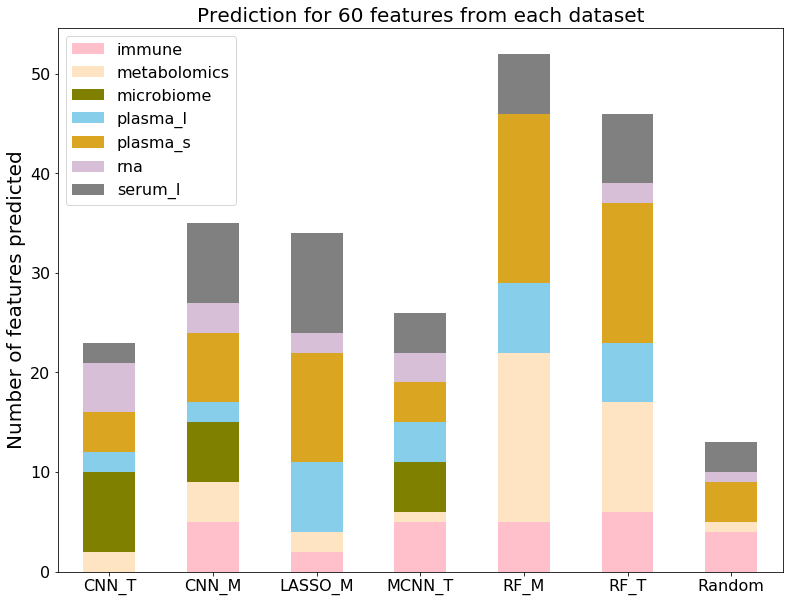

In [728]:
pivot_df.plot.bar(stacked=True, color=colors, figsize=(13,10))
plt.xticks(y_pos, predictors, rotation=0, fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel('Models', fontsize=18)
plt.legend(loc=2, prop={'size': 16})
plt.xlabel('')
plt.ylabel('Number of features predicted', fontsize=20)
plt.title('Prediction for 60 features from each dataset', fontsize=20)
plt.savefig('benchmark.png', dpi=500)

In [358]:
predictors = ['RF', 'LASSO', 'CNN', 'MCNN', 'Random', 'Dummy']
y_pos = np.arange(len(predictors))

In [359]:
features = [RF_df.shape[0], LS_df.shape[0], CNN_df.shape[0], 
            MCNN_df.shape[0], Random_df.shape[0], Dummy_df.shape[0]]

In [ ]:
import seaborn as sns

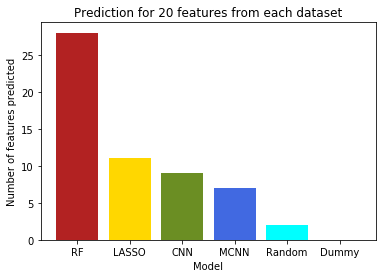

In [338]:
#Plot the results
f = plt.figure()
plt.bar(y_pos, features, color=['firebrick', 'gold', 'olivedrab', 'royalblue', 
                                       'cyan', 'salmon'])
plt.xticks(y_pos, predictors)
plt.xlabel('Model')
plt.ylabel('Number of features predicted')
plt.title('Prediction for 20 features from each dataset')
plt.xticks(rotation=0)
#plt.show()

#os.chdir(Desktop)
f.savefig("Bars.pdf", bbox_inches='tight')

In [ ]:
#Boxplots
bxp = sns.boxplot(x=predictors, y=features, palette="Set2")
bxp.set_xticklabels(bxp.get_xticklabels(),rotation=0)
plt.xlabel('Models')
plt.ylabel('Spearman r')
plt.title('Accuracy over 20 features per omic dataset')
#plt.show()
fig = bxp.get_figure()
fig.savefig("boxesFeat_serum_l_test.pdf")